# Goal of the project
The goal of this project is to evaluate the procedure and results of an A/B test that was carried out, for an international online store. This will be done by exploring the data of the store that the test was based on, will regards to its... 

# Import libreries and download the data

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from scipy import stats as st
import math as mth


In [2]:
# downloading data tables localy
#marketing_data = pd.read_csv('ab_project_marketing_events.csv',parse_dates = ['start_dt' ,'finish_dt'])
#new_users_data = pd.read_csv('final_ab_new_users_upd.csv',parse_dates = ['first_date'])
#events_data = pd.read_csv('final_ab_events_us.csv.csv',parse_dates = ['event_dt'])
#test_data = pd.read_csv('final_ab_participants_upd.csv')


# downloading data tables from database
marketing_data = pd.read_csv('/datasets/ab_project_marketing_events.csv',parse_dates = ['start_dt' ,'finish_dt'])
new_users_data = pd.read_csv('/datasets/final_ab_new_users_upd.csv',parse_dates = ['first_date'])
events_data = pd.read_csv('/datasets/final_ab_events_us.csv.csv',parse_dates = ['event_dt'])
test_data = pd.read_csv('/datasets/final_ab_participants_upd.csv')




In [3]:
##fist look at the marketing_data table
marketing_data.head()

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


In [4]:
#fist look at the new_users_data table
new_users_data.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [5]:
#fist look at the events_data table
events_data.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [6]:
#fist look at the test_data table
test_data.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


# Data preprocessing

## marketing_data table 

In [7]:
#cheking for missing values and data types
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes


In [8]:
#checking the first and last dates of marketing campaign
#first and last lanch date
print(marketing_data['start_dt'].min())
print(marketing_data['start_dt'].max())
print()
#first and last end campaign date
print(marketing_data['finish_dt'].min())
print(marketing_data['finish_dt'].max())

2020-01-25 00:00:00
2020-12-30 00:00:00

2020-02-07 00:00:00
2021-01-07 00:00:00


In [9]:
#cheking for values of the columns
marketing_data.describe()

,name,regions,start_dt,finish_dt
count,14,14,14,14
unique,14,6,14,14
top,Labor day (May 1st) Ads Campaign,APAC,2020-02-14 00:00:00,2020-05-11 00:00:00
freq,1,4,1,1
first,NaN,NaN,2020-01-25 00:00:00,2020-02-07 00:00:00
last,NaN,NaN,2020-12-30 00:00:00,2021-01-07 00:00:00


In [10]:
marketing_data['name'].unique()

array(['Christmas&New Year Promo', "St. Valentine's Day Giveaway",
       "St. Patric's Day Promo", 'Easter Promo', '4th of July Promo',
       'Black Friday Ads Campaign', 'Chinese New Year Promo',
       'Labor day (May 1st) Ads Campaign',
       "International Women's Day Promo",
       'Victory Day CIS (May 9th) Event', 'CIS New Year Gift Lottery',
       'Dragon Boat Festival Giveaway', "Single's Day Gift Promo",
       'Chinese Moon Festival'], dtype=object)

In [11]:
marketing_data['regions'].unique()

array(['EU, N.America', 'EU, CIS, APAC, N.America', 'N.America', 'APAC',
       'EU, CIS, APAC', 'CIS'], dtype=object)

In [12]:
#cheking for duplicates
marketing_data.duplicated().sum()

0

## new_users_data table

In [13]:
#cheking for missing values and data types
new_users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  object        
 3   device      58703 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ MB


In [14]:
#checking the first and last dates of sign up users
print(new_users_data['first_date'].min())
print(new_users_data['first_date'].max())


2020-12-07 00:00:00
2020-12-23 00:00:00


In [15]:
#cheking for values of the columns
new_users_data.describe()

,user_id,first_date,region,device
count,58703,58703,58703,58703
unique,58703,17,4,4
top,570AB1D7864748AB,2020-12-21 00:00:00,EU,Android
freq,1,6077,43396,26159
first,NaN,2020-12-07 00:00:00,NaN,NaN
last,NaN,2020-12-23 00:00:00,NaN,NaN


In [16]:
new_users_data['region'].unique()

array(['EU', 'N.America', 'APAC', 'CIS'], dtype=object)

In [17]:
new_users_data['device'].unique()

array(['PC', 'Android', 'iPhone', 'Mac'], dtype=object)

In [18]:
#cheking for duplicates
new_users_data.duplicated().sum()

0

## events_data

In [19]:
#cheking for missing values and data types
events_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  object        
 3   details     60314 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 12.9+ MB


In [20]:
#checking the missing values portion in details column
events_data['details'].isnull().sum()/ len(events_data)

0.8576697714041641

In [21]:
#checking the first and last dates of events
print(events_data['event_dt'].min())
print(events_data['event_dt'].max())


2020-12-07 00:00:33
2020-12-30 23:36:33


In [22]:
#cheking for values of the columns
events_data.describe()

,details
count,60314.000000
mean,23.881219
std,72.228884
min,4.990000
25%,4.990000
50%,4.990000
75%,9.990000
max,499.990000


In [23]:
#checking the object values of the table
events_data.drop('details', axis =1).describe()

,user_id,event_dt,event_name
count,423761,423761,423761
unique,58703,257138,4
top,A3917F81482141F2,2020-12-23 02:37:24,login
freq,36,10,182465
first,NaN,2020-12-07 00:00:33,NaN
last,NaN,2020-12-30 23:36:33,NaN


In [24]:
events_data['event_name'].unique()

array(['purchase', 'product_cart', 'product_page', 'login'], dtype=object)

In [25]:
#cheking for duplicates
events_data.duplicated().sum()

0

## test_data table

In [26]:
#cheking for missing values and data types
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


In [27]:
#cheking for values of the columns
test_data.describe()

,user_id,group,ab_test
count,14525,14525,14525
unique,13638,2,2
top,213C96A57E70B18F,A,interface_eu_test
freq,2,8214,10850


In [28]:
#checking unique test groups
test_data['group'].unique()

array(['A', 'B'], dtype=object)

In [29]:
#checking the unique names of the tests
test_data['ab_test'].unique()


array(['recommender_system_test', 'interface_eu_test'], dtype=object)

In [30]:
#cheking for duplicates
test_data.duplicated().sum()

0

## Data preprocessing summary and conclusions
**marketing_data**   
 - *dates* - the dates of the campaigns are almost for a year. It seems that some of the marketing campaigns are not relevent for the current A/B test.   
 - *campaigns* - there are 14 different campaigns. Some of the campaigns are for specific holidays for unique regions. 
 - *regions* - 6 unique regions. Althow most of campaigns are for multiple regions. For region analysis of this table extracting of unique regions is necessary.    
 - *missing values* - no missing values.   
 
 **new_users_data**    
 -  *dates* - there are 2 additional days of new users data (after the 21/12/2020) that does not fit the end date of new users sign up in the description.    
 -  *users* - all users in the table are unique users (almost 60 thousand).   
 -  *regions* - 4 unique regions.
 -  *devices* - 4 unique devices. Allthow there are 2 cellphones and 2 computers. It may be necessary to group them into 2 unique devices in further analysis.   
 - *missing values* - no missing values.
 
 **event_data**
 -  *dates* - correspond to the description (07/12 - 30/12/2020).   
 -  *details* - There are extreme large values that are affecting the mean and std (max = 499, min = 4.9, mean = 23.8, std = 72.2, 75% of values are lower then 9.99).    
 -  *users* - 58,703 thousand unique users out of 423 thousand rows. The number of unique users matches the number of new users in 'new_users_data' table.        
 -  *event name* - 4 unique events. 
 -  *missing values* - there is around 85% missing values in the details column. Needs further check.    
 
 **test_data** 
 - *users* - there are less unique users then non unique, which means there are users who assigned to both groups.    
 - *groups* - 2 test groups.  
 - *test* - 2 different tests. 


# Exploratory Data Analysis (EDA)

## marketing_data

In [31]:
#sorting campaigns by starting date
marketing_data.sort_values(by = 'start_dt')

,name,regions,start_dt,finish_dt
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11
11,Dragon Boat Festival Giveaway,APAC,2020-06-25,2020-07-01
4,4th of July Promo,N.America,2020-07-04,2020-07-11
13,Chinese Moon Festival,APAC,2020-10-01,2020-10-07


We can see that there is only 1 campaigns that is relevent for the current A/B test dates: the 'Christmas&New Year Promo' marketing in Europe and North America that started on the 25/12/2020 and ended on the 07/01/2021.  


## new_users_data

In [32]:
#printing first 5 rows
new_users_data.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [33]:
#remooving time stamp from first_date column
new_users_data['first_date'] = new_users_data['first_date'].dt.date

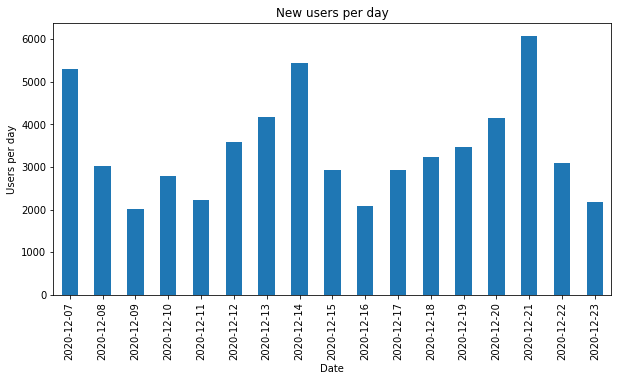

In [34]:
#grouping sign up users by date
users_by_date = new_users_data.groupby('first_date')['user_id'].count()

#ploting a bar chart for number of new users per day
users_by_date.plot(x = 'first_date',figsize = (10, 5), kind = 'bar')
plt.title('New users per day')
plt.ylabel('Users per day')
plt.xlabel('Date')
plt.show()

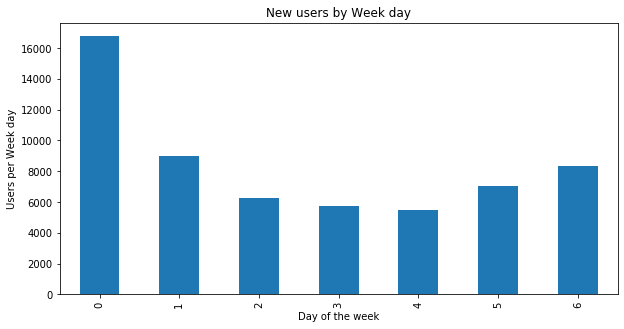

In [45]:
#creating column of day in the week
new_users_data['week_day'] = pd.DatetimeIndex(new_users_data['first_date']).weekday

#grouping new users by day of the week
users_by_week_day = new_users_data.groupby('week_day')['user_id'].count()
#plotting a bar churt of new users by weekday
users_by_week_day.plot(x = 'week_day',figsize = (10, 5), kind = 'bar')
plt.title('New users by Week day')
plt.ylabel('Users per Week day')
plt.xlabel('Day of the week')
plt.show()


We can see that most users sign up at Monday. 

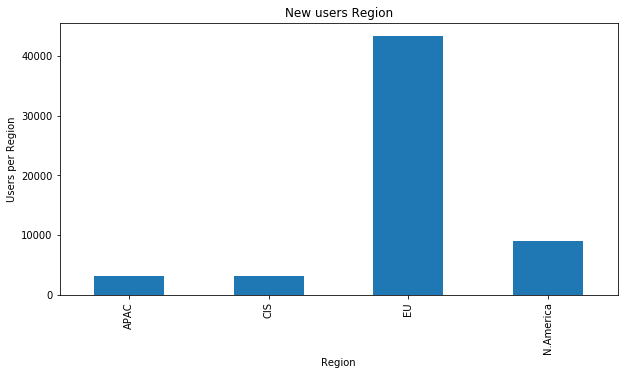

In [47]:
#grouping by region
users_by_region = new_users_data.groupby('region')['user_id'].count()

#plotting a bar churt of new users by region
users_by_region.plot(x = 'region',figsize = (10, 5), kind = 'bar')
plt.title('New users by Region')
plt.ylabel('Users per Region')
plt.xlabel('Region')
plt.show()

We can see that the majority of users are from Europe

In [49]:
#checking unique values in device column
new_users_data['device'].unique()

array(['PC', 'Android', 'iPhone', 'Mac'], dtype=object)

In [51]:
#changing the device column values to cellphone and computer
new_users_data['device'] = new_users_data['device'].replace('Android', 'cellphone').replace('iPhone', 'cellphone')\
.replace('PC', 'computer').replace('Mac', 'computer')

#checking unique values in device column after changing values
new_users_data['device'].unique()

array(['computer', 'cellphone'], dtype=object)

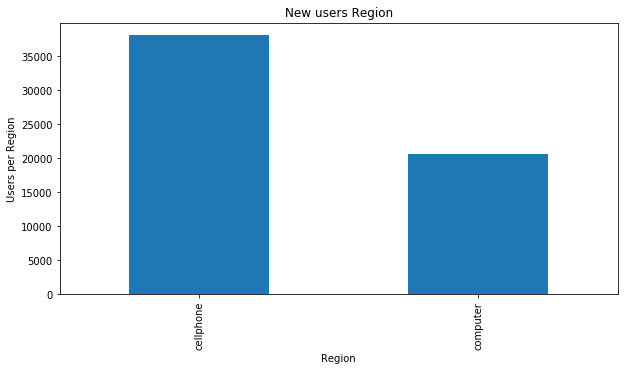

In [52]:
#grouping by region
users_by_device = new_users_data.groupby('device')['user_id'].count()

#plotting a bar churt of new users by region
users_by_device.plot(x = 'region',figsize = (10, 5), kind = 'bar')
plt.title('New users Region')
plt.ylabel('Users per Region')
plt.xlabel('Region')
plt.show()

We can see that most of users sign up from cellphones. 

## events_data

In [57]:
#printing first 5 rows
events_data.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [58]:
#grouping by event name and counting details column to check pattern in missing values
events_data.groupby('event_name')['details'].count()

event_name
login               0
product_cart        0
product_page        0
purchase        60314
Name: details, dtype: int64

We can see that the missing values represent the absence of purchase. I would prefer to replace them with zero values to prevent errors.

In [60]:
#replacing missing values with zero in the details column
events_data['details'] = events_data['details'].fillna(0)
events_data['details'].isnull().sum()

0

In [67]:
#taking alook at the event funnel 
events_data.groupby('event_name')['user_id'].nunique().sort_values(ascending = False)

event_name
login           58696
product_page    38929
purchase        19568
product_cart    19284
Name: user_id, dtype: int64

In [1]:
events_data['date'] = pd.DatetimeIndex(events_data['event_dt']).date

NameError: name 'pd' is not defined

We can see that the order of the funnel is not right. "Product cart" event has more actions then the "Purchase" event. The reason for that is probably because some users  added the product to the cart but havent made the purchase eventually. 

## test_data

In [105]:
#printing the first 5 rows for my convinience
test_data.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


In [112]:
#dividing the test tables to 2 tables for each test
system_test = test_data.query('ab_test == "recommender_system_test"')
interface_test = test_data.query('ab_test == "interface_eu_test"')


In [113]:
#checking the portions of groups for recommender_system_test
system_test.groupby('group')['user_id'].count()

group
A    2747
B     928
Name: user_id, dtype: int64

In [119]:
#checking if there users who enter both groups
system_test['user_id'].nunique()/len(interface_test)

0.3387096774193548

In [114]:
#checking the portions of groups for interface_eu_test
interface_test.groupby('group')['user_id'].count()

group
A    5467
B    5383
Name: user_id, dtype: int64

In [120]:
#checking if there users who enter both groups
interface_test['user_id'].nunique()/len(interface_test)

1.0

In [118]:
#checking if there users who enter both groups
interface_test['user_id'].nunique()/len(interface_test)

1.0

### conclusion 
It seems that somthing went wrong in the description of the test. We can see that the intended test - "recommender_system_test", has to many disadvantges. we can see that the proportion of A/B groupes in this test too large. also the proportion of users who enter both tests is to large (33%). On the other hand, it the proportions of the  "interface_eu_test" is good and also there are no users in both samples.    
It seems there was a mixup with the description and the intended test is the  "interface_eu_test". Thats why it seems logical to check this test and leave the "recommender_system_test", because with those proportions and the lack of additional information there is no point of checking the test. 

# A/B test - interface_eu_test

In [128]:
# merging the interface tabel with events table
events_interface_test = interface_test.merge(events_data, on= 'user_id', how = 'left')
events_interface_test.head()

,user_id,group,ab_test,event_dt,event_name,details,date
0,D4E530F6595A05A3,A,interface_eu_test,2020-12-22 06:01:01,product_cart,0.0,2020-12-22
1,D4E530F6595A05A3,A,interface_eu_test,2020-12-26 09:31:53,product_cart,0.0,2020-12-26
2,D4E530F6595A05A3,A,interface_eu_test,2020-12-29 23:35:45,product_cart,0.0,2020-12-29
3,D4E530F6595A05A3,A,interface_eu_test,2020-12-22 06:00:57,login,0.0,2020-12-22
4,D4E530F6595A05A3,A,interface_eu_test,2020-12-26 09:31:53,login,0.0,2020-12-26


In [127]:
#checking for missing values and dtypes
events_interface_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78929 entries, 0 to 78928
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     78929 non-null  object        
 1   group       78929 non-null  object        
 2   ab_test     78929 non-null  object        
 3   event_dt    78929 non-null  datetime64[ns]
 4   event_name  78929 non-null  object        
 5   details     78929 non-null  float64       
 6   date        78929 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 7.3+ MB


In [126]:
#looking at non numerical values with the describe method
events_interface_test.drop('details', axis = 1).describe()

,user_id,group,ab_test,event_dt,event_name,date
count,78929,78929,78929,78929,78929,78929
unique,10850,2,1,50761,4,23
top,11285A53EC2B2042,A,interface_eu_test,2020-12-20 02:51:18,login,2020-12-21
freq,32,40078,78929,7,33868,6070
first,NaN,NaN,NaN,2020-12-07 00:02:48,NaN,NaN
last,NaN,NaN,NaN,2020-12-30 18:28:55,NaN,NaN


In [129]:
events_interface_test.head()

,user_id,group,ab_test,event_dt,event_name,details,date
0,D4E530F6595A05A3,A,interface_eu_test,2020-12-22 06:01:01,product_cart,0.0,2020-12-22
1,D4E530F6595A05A3,A,interface_eu_test,2020-12-26 09:31:53,product_cart,0.0,2020-12-26
2,D4E530F6595A05A3,A,interface_eu_test,2020-12-29 23:35:45,product_cart,0.0,2020-12-29
3,D4E530F6595A05A3,A,interface_eu_test,2020-12-22 06:00:57,login,0.0,2020-12-22
4,D4E530F6595A05A3,A,interface_eu_test,2020-12-26 09:31:53,login,0.0,2020-12-26


In [150]:
#creaating a pivot table for dates of the test and number of unique users at each event
event_pivot = events_interface_test.pivot_table(index = ['date','group'], columns = 'event_name', values = 'user_id', aggfunc = 'nunique').reset_index()
event_pivot.head()

event_name,date,group,login,product_cart,product_page,purchase
0,2020-12-07,A,455.0,131.0,303.0,155.0
1,2020-12-07,B,448.0,139.0,283.0,154.0
2,2020-12-08,A,497.0,144.0,342.0,169.0
3,2020-12-08,B,499.0,166.0,323.0,171.0
4,2020-12-09,A,505.0,159.0,335.0,173.0


In [151]:

#building an array with group value and unique dates
date_groups = event_pivot[['date', 'group']].drop_duplicates()


In [153]:
#creating cumulative table of events
events_cum = date_groups.apply(lambda x: event_pivot[np.logical_and
                        (event_pivot['date'] <= x['date'], event_pivot['group']== x['group'])]
 .agg({'date':'max', 'group':'max', 'login':'sum', 'product_page':'sum', 'product_cart':'sum', 'purchase':'sum'}),
                               axis=1).sort_values(by = ['date', 'group'])
events_cum.head()

,date,group,login,product_page,product_cart,purchase
0,2020-12-07,A,455.0,303.0,131.0,155.0
1,2020-12-07,B,448.0,283.0,139.0,154.0
2,2020-12-08,A,952.0,645.0,275.0,324.0
3,2020-12-08,B,947.0,606.0,305.0,325.0
4,2020-12-09,A,1457.0,980.0,434.0,497.0


In [155]:
# creating columns for conversion rate for events
events_cum['product_page_con'] = events_cum['product_page']/events_cum['login']
events_cum['product_cart_con'] = events_cum['product_cart']/events_cum['login']
events_cum['purchase_con'] = events_cum['purchase']/events_cum['login']
events_cum.head()

,date,group,login,product_page,product_cart,purchase,product_page_con,product_cart_con,purchase_con
0,2020-12-07,A,455.0,303.0,131.0,155.0,0.665934,0.287912,0.340659
1,2020-12-07,B,448.0,283.0,139.0,154.0,0.631696,0.310268,0.343750
2,2020-12-08,A,952.0,645.0,275.0,324.0,0.677521,0.288866,0.340336
3,2020-12-08,B,947.0,606.0,305.0,325.0,0.639916,0.322070,0.343189
4,2020-12-09,A,1457.0,980.0,434.0,497.0,0.672615,0.297872,0.341112


In [162]:
#choosing the A group with the cumulative product_page conversion
cum_product_page_A = events_cum[events_cum['group'] == 'A'][['date', 'product_page_con']]
#choosing the B group with the cumulative product_page
cum_product_page_B = events_cum[events_cum['group'] == 'B'][['date', 'product_page_con']]

#choosing the A group with the cumulative product_page conversion
cum_product_cart_con_A = events_cum[events_cum['group'] == 'A'][['date', 'product_cart_con']]
#choosing the B group with the cumulative product_page
cum_product_cart_con_B = events_cum[events_cum['group'] == 'B'][['date', 'product_cart_con']]

#choosing the A group with the cumulative product_page conversion
cum_purchase_con_A = events_cum[events_cum['group'] == 'A'][['date', 'purchase_con']]
#choosing the B group with the cumulative product_page
cum_purchase_con_B = events_cum[events_cum['group'] == 'B'][['date', 'purchase_con']]

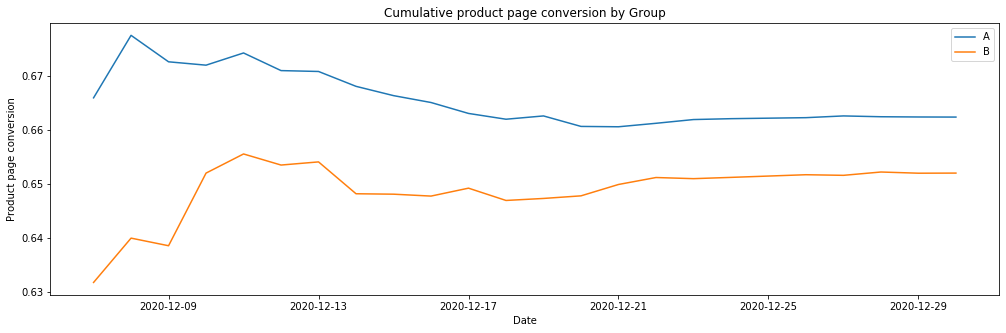

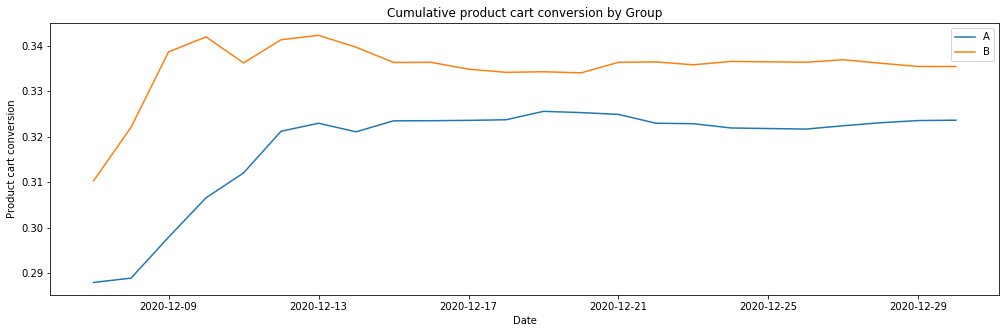

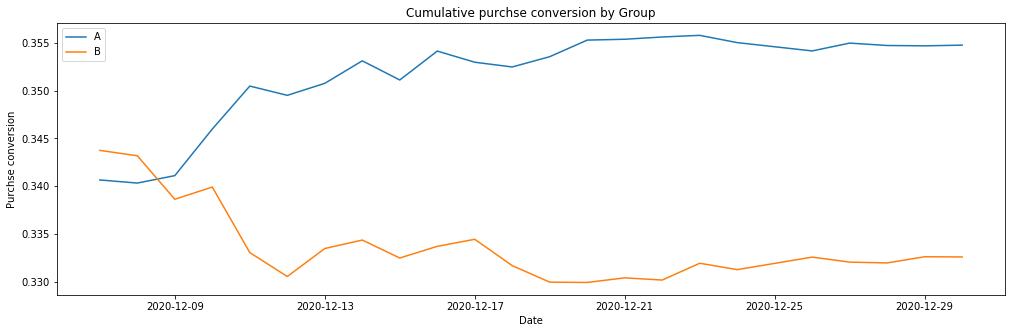

In [175]:
#plotting  a graph for cumulative product_page conversion by group
plt.figure(figsize=(17,5))
plt.plot(cum_product_page_A['date'], cum_product_page_A['product_page_con'], label = 'A')
plt.plot(cum_product_page_B['date'], cum_product_page_B['product_page_con'], label = 'B')
plt.title('Cumulative product page conversion by Group')
plt.ylabel('Product page conversion')
plt.xlabel('Date')
plt.legend()

#plotting  a graph for cumulative product_cart conversion by group 
plt.figure(figsize=(17,5))
plt.plot(cum_product_cart_con_A['date'], cum_product_cart_con_A['product_cart_con'], label = 'A')
plt.plot(cum_product_cart_con_B['date'], cum_product_cart_con_B['product_cart_con'], label = 'B')
plt.title('Cumulative product cart conversion by Group')
plt.ylabel('Product cart conversion')
plt.xlabel('Date')
plt.legend()

#plotting  a graph for cumulative purchase conversion by group
plt.figure(figsize=(17,5))
plt.plot(cum_purchase_con_A['date'], cum_purchase_con_A['purchase_con'], label = 'A')
plt.plot(cum_purchase_con_B['date'], cum_purchase_con_B['purchase_con'], label = 'B')
plt.title('Cumulative purchse conversion by Group')
plt.ylabel('Purchse conversion')
plt.xlabel('Date')
plt.legend()

In the product page comulative conversion graph we can see that goup A is ablove group B. In the product cart conversion graph it seems that group B has greater conversion then group A. In the purchase conversion it seems that we have a big difference between groups. 

# Evaluate the A/B test results

## hypohteses
1. **Product page**
 - **H0** - There is no significant difference between groups in the conversion of product page.
 - **H1** - There is a significant difference in the conversion of product page between group A and B.


2. **Product cart**   
 - **H0** - There is no significant difference between groups in the conversion of product cart.
 - **H1** - There is a significant difference in the conversion of product cart between group A and B.


3. **Purchase**
 - **H0** - There is no significant difference between groups in the conversion of purchase.
 - **H1** - There is a significant difference in the conversion of purchase between group A and B.


In [168]:
#grouping by event_name and group
events_interface_test.groupby(['event_name', 'group'])['user_id'].nunique()


event_name    group
login         A        5466
              B        5383
product_cart  A        1756
              B        1812
product_page  A        3639
              B        3527
purchase      A        1931
              B        1782
Name: user_id, dtype: int64

In [174]:
alpha = .05 # significance level
bonferroni_alpha = alpha/3

trials = np.array([5466, 5386])

successes_product_page = np.array([3639, 3527])
successes_product_cart = np.array([1756, 1812])
successes_purchase = np.array([1931, 1782])

# success proportion  product page:
p1_product_page =  successes_product_page[0]/trials[0]
p2_product_page = successes_product_page[1]/trials[1]
# success proportion  combined 
p_combined_product_page = (successes_product_page[0] + successes_product_page[1]) / (trials[0] + trials[1])
difference_product_page = p1_product_page - p2_product_page
# calculating the statistic in standard deviations of the standard normal distribution
z_value_product_page = difference_product_page / mth.sqrt(p_combined_product_page * (1 - p_combined_product_page) * (1/trials[0] + 1/trials[1]))

# setting up the standard normal distribution (mean 0, standard deviation 1)
distr = st.norm(0, 1) 
p_value_product_page = (1 - distr.cdf(abs(z_value_product_page))) * 2
print('p_values for product page: ', p_value_product_page)
if (p_value_product_page < bonferroni_alpha):
    print("Rejecting the null hypothesis: there is a significant difference between the proportions")
else:
    print("Failed to reject the null hypothesis: there is no reason to consider the proportions different") 
print()

# success proportion  product cart:
p1_product_cart =  successes_product_cart[0]/trials[0]
p2_product_cart =  successes_product_cart[1]/trials[1]
# success proportion  combined 
p_combined_product_cart = (successes_product_cart[0] + successes_product_cart[1]) / (trials[0] + trials[1])
difference_product_cart = p1_product_cart - p2_product_cart
# calculating the statistic in standard deviations of the standard normal distribution
z_value_prodcut_cart = difference_product_cart / mth.sqrt(p_combined_product_cart * (1 - p_combined_product_cart) * (1/trials[0] + 1/trials[1]))

# setting up the standard normal distribution (mean 0, standard deviation 1)
#distr = st.norm(0, 1) 
p_value_product_cart = (1 - distr.cdf(abs(z_value_prodcut_cart))) * 2
print('p_values for product cart: ', p_value_product_cart)
if (p_value_product_cart < bonferroni_alpha):
    print("Rejecting the null hypothesis: there is a significant difference between the proportions")
else:
    print("Failed to reject the null hypothesis: there is no reason to consider the proportions different") 
print()

# success proportion  purchase:
p1_purchase = successes_purchase[0]/trials[0]
p2_purchase =  successes_purchase[1]/trials[1]
# success proportion  combined 
p_combined_purchase = (successes_purchase[0] + successes_purchase[1]) / (trials[0] + trials[1])
difference_purchase = p1_purchase - p2_purchase
# calculating the statistic in standard deviations of the standard normal distribution
z_value_purchase = difference_purchase / mth.sqrt(p_combined_purchase * (1 - p_combined_purchase) * (1/trials[0] + 1/trials[1]))

# setting up the standard normal distribution (mean 0, standard deviation 1)
#distr = st.norm(0, 1) 
p_value_purchase = (1 - distr.cdf(abs(z_value_purchase))) * 2
print('p_values for purchase: ', p_value_purchase)
if (p_value_purchase < bonferroni_alpha):
    print("Rejecting the null hypothesis: there is a significant difference between the proportions")
else:
    print("Failed to reject the null hypothesis: there is no reason to consider the proportions different") 



p_values for product page:  0.23036254516144883
Failed to reject the null hypothesis: there is no reason to consider the proportions different

p_values for product cart:  0.092599708424419
Failed to reject the null hypothesis: there is no reason to consider the proportions different

p_values for purchase:  0.013853331872959673
Rejecting the null hypothesis: there is a significant difference between the proportions


# conclusions

We failed to reject the null hypothesis on 2 funnel stages: "Productd page", "Product cart". That is,  there is no difference between the groups in those funnel stages.           
The null hypothesis in the purchase stage has been rejected. That is, there is a significant difference between group A and B in the purchase stage.     
Althow the purchase rate is high for the A group the the results for other stages is not significant. The results of the test is based on a small period of time, so I would recommend to take the test again for longer period of time and then make conclusions.    
